# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A14743301 - nasalim@ucsd.edu - Nadya Audrey Salim
- A14233594 - tpaulo@ucsd.edu - Tyler Paulo
- A13856476 - jjp040@ucsd.edu - Joycelyn Peng
- A11634379 - adz001@ucsd.edu - Adam Zhang
- A12327392 - dnvo@ucsd.edu - Debbie Vo

### Member Contribution:
- Nadya: Improved Sanitation (Data Cleaning/Visualization)
- Tyler: Safe Sanitation (Data Cleaning/Visualization)
- Joycelyn: CHE as percentage of GDP (Data Cleaning/Visualization)
- Adam: Life Expectancy (Data Analysis)
- Debbie: Life Expectancy (Data Cleaning/Visualization)


### Introduction and Background

Initially, we were only interested in the factors of sex, lifestyle, and environment affecting life expectancy. However, after consulting with a TA about our research question, we decided to be more specific and look at the effects percentage of GDP spent on healthcare and prevalence of sanitation services has on life expectancy. We think that this would be important data considering the growing rate of homeless people on the street and even more severe situations such as the water crisis in Flint, Michigan.

In our hypothesis, we predict that countries that spend more of their GDP on health increase the life expectancy of their citizens. Meanwhile, on reuters.com, we read that the United States spends about twice as much as other high-income countries on health but has a relatively low life expectancy. We’re interested to see if the United States is the only country that has this uncommon relationship between the amount of money spent on health with life expectancy.

From this data, we also want to see how impactful sanitation is on health. According to Duncan Mara et al., lack of sanitation could lead to spread of disease and is often associated with poverty and accounts for about 10% of the global burden of disease. We assume that sanitation will have a big impact on the country’s life expectancy seeing the fact that has been laid out by Duncan Mara et al. Overall, we are interested in the effect of money spent on health and sanitation services on people’s health.


References (include links):
- 1) GDP on health: https://www.reuters.com/article/us-health-spending/u-s-health-spending-twice-other-countries-with-worse-results-idUSKCN1GP2YN
- 2) Sanitation and Health: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2981586/

### Data Description

- __Dataset Name:__ Life expectancy and Healthy life expectancy data by country
- __Link to the dataset:__ http://apps.who.int/gho/data/view.main.SDG2016LEXREGv?lang=en
- __Number of observations:__ 3111
- __Description:__ Gives the average life expectancy at birth by region and by country. Life expectancy is differentiated between that at birth and at 60 years, and also between the sexes. The dataset gives data from 2000 to 2016, but we will only be using 2015 data.


- __Dataset Name:__ Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%) data by country
- __Link to the dataset:__ http://apps.who.int/gho/data/view.main.GHEDCHEGDPSHA2011v?lang=en 
- __Number of Observations:__ 195
- __Description:__ The portion of resources channeled to the health sector in the whole economy of the country. This refers to the level of Current Health Expenditure expressed as a percentage of GDP. We’ll be using only 2015 data and it will be added as an additional column to the main dataset. 


- __Dataset Name:__ Basic and safely managed sanitation services data by country
- __Link to the Dataset:__ http://apps.who.int/gho/data/view.main.WSHSANITATIONv?lang=en
- __Number of Observations:__ 194
- __Description:__ Sanitation in this data refers to the provision of facilities and services for the safe disposal of human urine and feces. Sanitation facilities include flush/pour flush toilets connected to piped sewer systems, septic tanks or pit latrines, and composting toilets. We’ll be using only 2015 data and the total for using at least basic services, which will be added as an additional column on the main dataset. 


- __Dataset Name:__ People using safely managed sanitation services (% of population) or Improved Sanitation (% Overall Access)
- __Link to the dataset:__ https://data.worldbank.org/indicator/SH.STA.SMSS.ZS
- __Number of Observations:__265 
- __Description:__ The percentage of people using improved sanitation facilities that are not shared with other households and where excreta are safely disposed of in situ or transported and treated offsite. Improved sanitation facilities include flush/pour flush to piped sewer systems, septic tanks or pit latrines: ventilated improved pit latrines, compositing toilets or pit latrines with slabs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sp
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [24]:
### TYLER ### 
# Read 'SafeSanitation.csv' data file into 'safeSani' dataFrame.
safeSani = pd.read_csv('SafeSanitation.csv')
# Get rid of extraneous data columns.
safeSani = safeSani[['Unnamed: 0', '2015.2', '2015.5']]
# Clean 'safeSani' to get rid of any null values.
safeSani = safeSani.dropna(how='any')
# Make the index 'Unnamed: 0' (will rename below); holds country names.
safeSani = safeSani.set_index('Unnamed: 0')
# Drop the 'Country' column.
safeSani = safeSani.drop(['Country'])
# Rename the columns in 'safeSani' to be more descriptive.
safeSani = safeSani.rename(index=str, columns={'2015.2': 'Basic sani.', '2015.5': 'Safe sani.'})
# Set the index name to 'Country'.
safeSani.index.names = ['Country']
# Display 'safeSani' dataFrame.
safeSani

,Basic sani.,Safe sani.
Country,,
Albania,98,65
Algeria,87,19
Andorra,100,100
Argentina,95,26
Australia,100,74
Austria,100,97
Bahrain,100,93
Belarus,94,76
Belgium,99,97


In [25]:
### JOYCE ###
# import the csv as a panda dataframe
gdp_df = pd.read_csv("CHEGDP.csv")

# set the value of the first row to be the name of the columns
gdp_df.columns = gdp_df.iloc[0]

# drop the repeated row of labels
gdp_df = gdp_df.drop(gdp_df.index[[0]])

# drop the data for all years excecpt 2015
gdp_df = gdp_df.drop(columns=[' 2014',' 2013',' 2012',' 2011',' 2010',' 2009',' 2008',' 2007',' 2006',' 2005',' 2004',' 2003',' 2002',' 2001',' 2000'])
gdp_df = gdp_df.replace("No data", pd.np.nan).dropna(axis=0, how='any')
gdp_df = gdp_df.rename(columns={' 2015': '2015'})
gdp_df

,Country,2015
1,Afghanistan,10.3
2,Albania,6.8
3,Algeria,7.1
4,Andorra,12.0
5,Angola,2.9
6,Antigua and Barbuda,4.8
7,Argentina,6.8
8,Armenia,10.1
9,Australia,9.4
10,Austria,10.3


In [26]:
### NADYA ###
improvedSani = pd.read_csv('ImprovedSanitation.csv')

#Drop the first 3 rows - consisting unrelated information to the data being used
improvedSani = improvedSani.drop(improvedSani.index[[0,1,2]])

#Set the value of the 1st row to be the column labels
improvedSani.columns = improvedSani.iloc[0]

#Drop the first row
improvedSani = improvedSani.drop(improvedSani.index[[0]])
del improvedSani.columns.name

#Rename all of the columns
improvedSani = improvedSani.rename(columns={2000.0: 2000, 2001.0:2001, 2002.0:2002, 2003.0:2003, 2004.0:2004,
                                                       2005.0:2005, 2006.0:2006, 2007.0:2007, 2008.0:2008, 2009.0:2009,
                                                       2010.0:2010, 2011.0:2011, 2012.0:2012, 2013.0:2013, 2014.0:2014,
                                                       2015.0:2015})
#Drop other columns and only keep 2015 data
improvedSani = improvedSani.drop(columns=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

#Reset the index count and drop unnecessary columns
improvedSani.reset_index(level=0, inplace=True)
improvedSani= improvedSani.drop(columns=['index','Indicator Code','Indicator Name', 'Country Code'])

#Remove rows that have missing data
improvedSani.dropna(inplace=True)

#Rounding data values to 2 decimals
improvedSani[2015] = improvedSani[2015].apply(lambda x: round(x,2))

improvedSani

,Country Name,2015
3,Albania,64.82
4,Andorra,100.00
5,Arab World,50.70
6,United Arab Emirates,93.37
7,Argentina,26.48
11,Australia,74.21
12,Austria,96.78
15,Belgium,97.10
19,Bulgaria,48.86
22,Bosnia and Herzegovina,23.08


In [27]:
### DEBBIE ###
#reading the dataset 
comboLifeExp_df = pd.read_csv("LifeHealthyLifeExpectancy.csv")
#Dropping null values
comboLifeExp_df.dropna(inplace=True)
#Separating the dataset into two data frames
healthyLifeExp_df = comboLifeExp_df.drop(["Life expectancy at birth (years)", "Life expectancy at birth (years).1", "Life expectancy at birth (years).2", "Life expectancy at age 60 (years)", "Life expectancy at age 60 (years).1", "Life expectancy at age 60 (years).2"], axis=1)
lifeExp_df = comboLifeExp_df.drop(["Healthy life expectancy (HALE) at birth (years)", "Healthy life expectancy (HALE) at birth (years).1", "Healthy life expectancy (HALE) at birth (years).2", "Healthy life expectancy (HALE) at age 60 (years)", "Healthy life expectancy (HALE) at age 60 (years).1", "Healthy life expectancy (HALE) at age 60 (years).2"], axis=1)
#Rename columns so that it's more descriptive
healthyLifeExp_df.rename(index=str, columns={"Unnamed: 0": "Country", "Unnamed: 1": "Year"}, inplace=True)
#Setting the country as the index
healthyLifeExp_df = healthyLifeExp_df.set_index("Country")
#Renaming the columns so that it's more descriptive
lifeExp_df.rename(index=str, columns={"Unnamed: 0": "Country", "Unnamed: 1": "Year"}, inplace=True)
#Setting the country as the index
lifeExp_df = lifeExp_df.set_index("Country")
#Remove all years except 2015
lifeExp_df2015 = lifeExp_df.loc[(lifeExp_df.Year != ' 2000') & (lifeExp_df.Year != ' 2005') & (lifeExp_df.Year != ' 2010') & (lifeExp_df.Year != ' 2016')]
#Remove all years except 2015
healthyLifeExp_df2015 = healthyLifeExp_df.loc[(healthyLifeExp_df.Year != ' 2000') & (healthyLifeExp_df.Year != ' 2005') & (healthyLifeExp_df.Year != ' 2010') & (healthyLifeExp_df.Year != ' 2016')]

### Data Visualization


In [28]:
### ADAM ###

#Remove needless line
LifeExp = healthyLifeExp_df2015.drop(['Country'])
#Dropping Rwanda due to weird data
LifeExp = LifeExp.drop(['Rwanda'])
#Rename Conflicting Columns
improvedSani.columns = ['Country', 'Improved Sanitation']
gdp_df.columns = ['Country', 'GDP']
LifeExp.columns = ['Year', 'LifeExp at Birth', 'LifeExp at Birth Male', 'LifeExp at Birth Female', 'LifeExp at 60', 'LifeExp at 60 Male', 'LifeExp at 60 Female']
#safeSani.columns = []

#Merge DataFrames
gdp_safeSani = pd.merge(gdp_df, safeSani,  on='Country')
gdp_LifeExp = pd.merge(gdp_df, LifeExp,  on='Country')
gdp_impSani = pd.merge(gdp_df, improvedSani,  on='Country')

gdp_safeSani_LifeExp = pd.merge(gdp_safeSani, LifeExp,  on='Country')



In [29]:
#convert dtypes

gdp_safeSani[['GDP', 'Basic sani.', 'Safe sani.']] = gdp_safeSani[['GDP', 'Basic sani.', 'Safe sani.']].apply(pd.to_numeric)

gdp_LifeExp[['GDP', 'Year', 'LifeExp at Birth', 'LifeExp at Birth Male', 'LifeExp at Birth Female', 'LifeExp at 60', 'LifeExp at 60 Male', 'LifeExp at 60 Female']] = gdp_LifeExp[['GDP', 'Year', 'LifeExp at Birth', 'LifeExp at Birth Male', 'LifeExp at Birth Female', 'LifeExp at 60', 'LifeExp at 60 Male', 'LifeExp at 60 Female']].apply(pd.to_numeric)

gdp_impSani[['GDP', 'Improved Sanitation']] = gdp_impSani[['GDP', 'Improved Sanitation']].apply(pd.to_numeric)

gdp_safeSani_LifeExp[['GDP']] = gdp_safeSani_LifeExp[['GDP']].apply(pd.to_numeric)
gdp_safeSani_LifeExp[['Basic sani.']] = gdp_safeSani_LifeExp[['Basic sani.']].apply(pd.to_numeric)
gdp_safeSani_LifeExp[['LifeExp at Birth']] = gdp_safeSani_LifeExp[['LifeExp at Birth']].apply(pd.to_numeric)


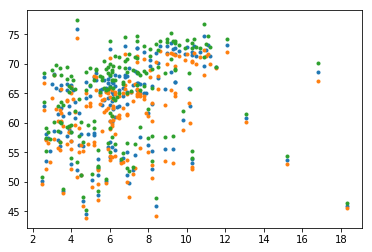

In [30]:
#GDP vs Life Expectency
plt.plot(gdp_LifeExp['GDP'], gdp_LifeExp['LifeExp at Birth'], '.')
plt.plot(gdp_LifeExp['GDP'], gdp_LifeExp['LifeExp at Birth Male'], '.')
plt.plot(gdp_LifeExp['GDP'], gdp_LifeExp['LifeExp at Birth Female'], '.')


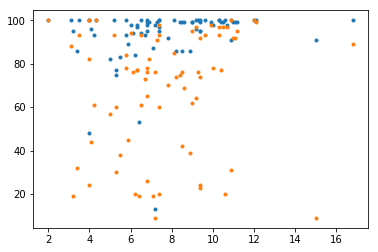

In [31]:
#GDP vs Safe Sanitation
plt.plot(gdp_safeSani['GDP'], gdp_safeSani['Basic sani.'], '.')
plt.plot(gdp_safeSani['GDP'], gdp_safeSani['Safe sani.'], '.')


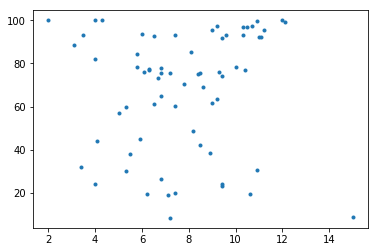

In [32]:
#GDP vs Improved Sanitation
plt.plot(gdp_impSani['GDP'], gdp_impSani['Improved Sanitation'], '.')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234D1C90BE0>,
      dtype=object)

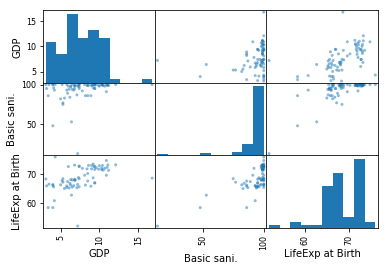

In [33]:

pd.plotting.scatter_matrix(gdp_safeSani_LifeExp[['GDP', 'Basic sani.', 'LifeExp at Birth']])

### Data Analysis and Results

### Privacy/Ethics Considerations

The data that we are going to use is open source for people to view, but we do not have explicit permission from the WHO. There are no privacy concerns regarding our datasets as the data already follows the Safe Harbour method and only displays gender and ages by country. There may be potential biases in the dataset due to the fact that all of the data we are using is coming from the same website. It isn’t quite clear how the data has been collected, but as far as we know, there shouldn’t be any other issues in terms of data privacy since, as we have mentioned before, our data has followed the Safe Harbour method and it doesn’t consist of individual personal information. 

Our data is in a form of statistics collected based on countries, and the only exclusions are due to a failure (or prevention) of information provision by the country in question. For instance, the Democratic People’s Republic of Korea has not disclosed their GDP health expenditure, or WHO was not able to acquire it. Issues of this sort will simply be addressed by cleaning these null cells from the data. Overall, our topic area and the included data analysis is not problematic in terms of data privacy, but an equitable impact is possible. If we approach our dataset with a bias that less well-off countries will immediately have a worse life expectancy, for example, it may skew our collective perspective and results. Instead, a neutral and unbiased approach is absolutely necessary to minimize confounds, even unconscious ones.

### Conclusions and Discussion

Conclusion/Discussion here.